# Homework #1

* copy this file into your drive
```
File -> Save a copy in Drive
```
* write the code in the cells provided for each questions
* <font color="red"> DO NOT DELETE or MODIFY </font> the first line of each cell (will be used to mark your homework, otherwise you will get 0)
* <font color="red"> DO NOT DELETE or MODIFY </font> function name, function input, and function output (return). Otherwise, you will get 0.
* <font color="red"> DO NOT ADD </font> anything outside the function. Otherwise, you will get 0.
* Make sure homework1_1-1_4 can run properly and can be tested with any image (not rely just on your images); otherwise, your homework will not be marked.

In [1]:
!wget https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe -O kitty.jpg
!wget https://drive.google.com/uc?id=1mIO58Oat2rxLg-c82eN2TLH8sTucQJGI -O noisy_ct.jpg
!wget https://drive.google.com/uc?id=1BNU8_HhPZ96PlImDia8u59QDR4V9wNwb -O amoeba.jpg

--2025-08-30 05:27:48--  https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.google.com (drive.google.com)... 142.250.31.113, 142.250.31.139, 142.250.31.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.31.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe [following]
--2025-08-30 05:27:48--  https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.167.132, 2607:f8b0:4004:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.167.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79570 (78K) [image/jpeg]
Saving to: ‘kitty.jpg’

kitty.jpg           100%[===================>]  77.71K  --.-KB/s    in 0.02s   

2025-08-30 05:27:50 (4.95 MB/s) - ‘kitty.jpg’ saved

In [51]:
# homework1_1 --> do not modify/delete this first line and do not add anything before this line

# import library for 1.1
import cv2
import numpy as np
import matplotlib.pyplot as plt



def homework1_1(rgb_image):
    # input -> rgb_image - type -> np.ndarray, size of - (height, width, 3) with dtype - uint8
    # output -> smoothed_img - type -> np.ndarray, size of - (height, width) with dtype - uint8
    #           mark_ROI - type -> np.ndarray, size of - (height, width) with dtype - uint8
    #           Gray_Level_img - type -> np.ndarray, size of - (height, width) with dtype - uint8


    # TO DO : You can use/modify the code guideline below or write your own code below here
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(rgb_image,cv2.COLOR_RGB2GRAY)

    # 1.1 Use the median filter to smooth the image
    smoothed_img = cv2.medianBlur(gray_image, 5)

    # 1.2 Make ROI with
    # Create an area of interest (ROI) using image slicing
    # copy_smooth_img = cv2.cvtColor(smoothed_img, cv2.COLOR_GRAY2RGB)
    # ROI_image = cv2.rectangle(copy_smooth_img,(300, 275), (300+380, 275+435), (255,0,0),4);
    mark_ROI = smoothed_img[300:300+380,275:275+435]


    # 1.3 Use Gray Level slicing
    Gray_Level_img = np.zeros_like(mark_ROI)
    Gray_Level_img[(mark_ROI >= 230)]  = 255


    return smoothed_img, mark_ROI, Gray_Level_img



# Do not add anything outside the function in the submission

In [107]:
# homework1_2 --> do not modify/delete this first line and do not add anything before this line

def homework1_2(rgb_image):
    # input -> rgb_image - type -> np.ndarray, size of - (height, width, 3) with dtype - uint8
    # output -> filtered_image - type -> np.ndarray, size of - (height, width, 3) with dtype - uint8

    filtered_image = np.zeros((rgb_image.shape),dtype=np.uint8)

    # TO DO - Design your own filter here
    # sharpening sharpen = original + (original - blur)*amount
    blur = cv2.GaussianBlur(rgb_image, (5,5), 0)
    amount = 1.5
    sharp = cv2.addWeighted(rgb_image, 1+amount, blur, -amount, 0)

    # change color to hsv
    hsv = cv2.cvtColor(sharp, cv2.COLOR_RGB2HSV).astype(np.float32)
    h, s, v = cv2.split(hsv)

    # saturation +40%, brightness +20%
    s = np.clip(s * 1.6, 0, 255)
    v = np.clip(v * 1.4, 0, 255)

    hsv = cv2.merge([h, s, v]).astype(np.uint8)
    filtered_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    return filtered_image


# Do not add anything outside the function in the submission

# Test our function here

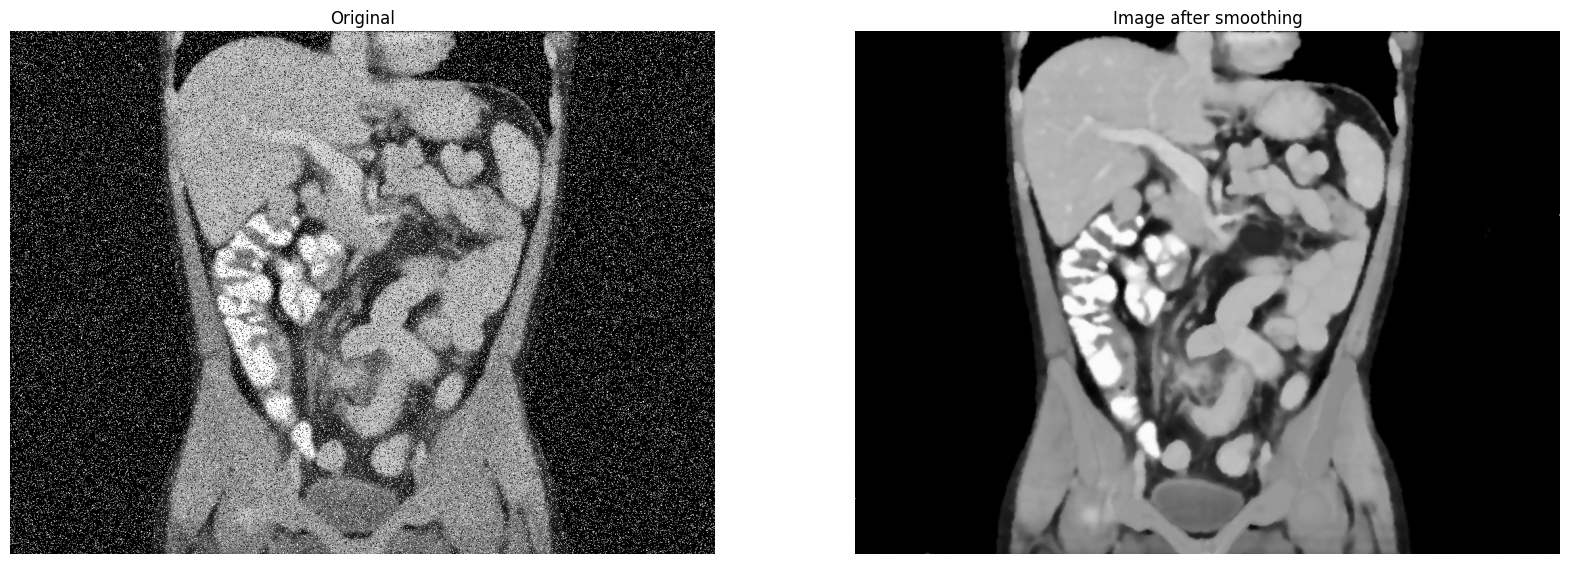

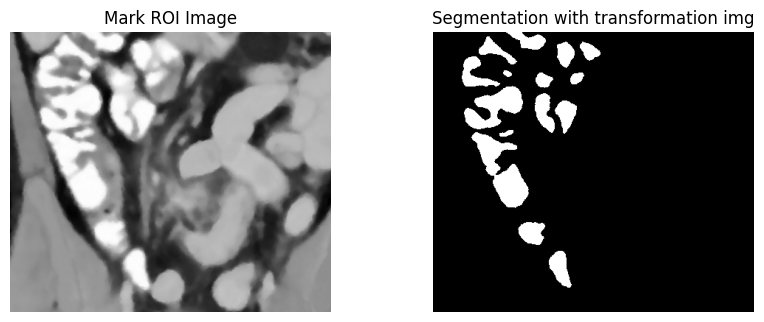

In [55]:
# test homework1_1
img1_1 = cv2.imread('noisy_ct.jpg')
smoothed_img, mark_ROI, Gray_Level_img = homework1_1(img1_1[:,:,::-1])
# Picture show Row1
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(img1_1[:, :, ::-1])
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_img, cmap='gray')
plt.title('Image after smoothing')
plt.axis('off')

# Picture show Row2
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(mark_ROI, cmap='gray')
plt.title('Mark ROI Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(Gray_Level_img, cmap='gray')
plt.title('Segmentation with transformation img')
plt.axis('off')

plt.show()


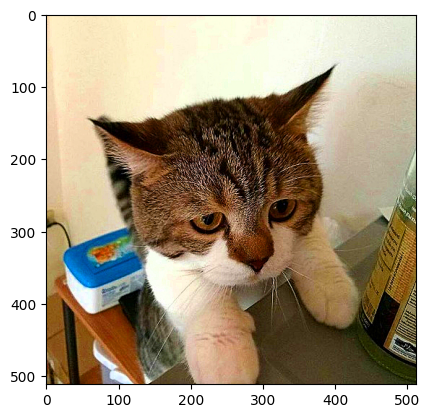

In [108]:
# test homework1_2
img1_2 = cv2.imread("kitty.jpg")
img_hw1_2 = homework1_2(img1_2[:, :, ::-1])
plt.imshow(img_hw1_2)
plt.show()

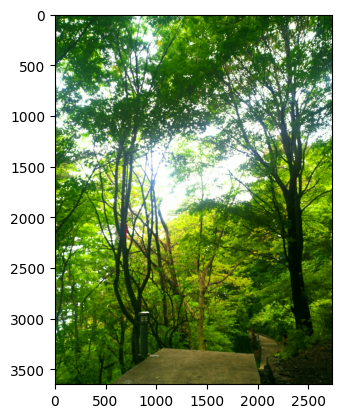

In [109]:
img1_2 = cv2.imread("test.jpg")
img_hw1_2 = homework1_2(img1_2[:, :, ::-1])
plt.imshow(img_hw1_2)
plt.show()